In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from dateutil.relativedelta import relativedelta
from datetime import datetime

In [ ]:
banking = pd.read_csv('https://raw.githubusercontent.com/Ohio1Tea/Hackathon/main/banking-information-data.csv')
dependent = pd.read_csv('https://raw.githubusercontent.com/Ohio1Tea/Hackathon/main/dependent-data.csv')
net_income = pd.read_csv('https://raw.githubusercontent.com/Ohio1Tea/Hackathon/main/family-net-income-data.csv')
applicant = pd.read_csv('https://raw.githubusercontent.com/Ohio1Tea/Hackathon/main/applicant-data.csv')
server = pd.read_csv('https://raw.githubusercontent.com/Ohio1Tea/Hackathon/main/server-log-data.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Check Eligibility

In [ ]:
banking = banking.rename(columns={'TRANSIT_NUMBER': 'ACCOUNT_NUMBER', 'ACCOUNT_NUMBER': 'TRANSIT_NUMBER'})
banking.head()

,APP_ID,FINANCIAL_INSTITUTION_NUMBER,ACCOUNT_NUMBER,TRANSIT_NUMBER
0,100000,925,6.709730e+11,14620.0
1,100001,284,7.343455e+11,93305.0
2,100002,248,1.454532e+11,64103.0
3,100003,499,7.194849e+11,65314.0
4,100004,248,2.990500e+11,20629.0


In [ ]:
dependent.head()

,APP_ID,P8N,PARTNER_P8N,DATE_BIRTH_1,DATE_BIRTH_2,DATE_BIRTH_3,DATE_BIRTH_4,DATE_BIRTH_5,DATE_BIRTH_6,DATE_BIRTH_7,DATE_BIRTH_8,DATE_BIRTH_9
0,100000,39916021,65771788.0,2016-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100001,28596991,25829667.0,2019-10-17,2022-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100002,65751811,63839036.0,2019-08-05,2013-06-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100003,43012353,73277757.0,2013-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100004,34120896,72359770.0,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Creating a list containing applicants' ID that do not meet the critiria.
ineligi = []

In [ ]:
from datetime import datetime, date

In [ ]:
# checking exsiting dependent under each app_ID, if there is a dependent has a
# age greater than 18, add APP_ID into the list
for index, row in dependent.iterrows():
  for i in range(9):
    birthdate_str = row['DATE_BIRTH_{}'.format(i+1)]
    if type(birthdate_str) != float:
      birthdate = datetime.strptime(birthdate_str, '%Y-%m-%d').date()  # convert to date object
      today = date.today()  # get today's date
      age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))

      if age >= 18 and row['APP_ID'] not in ineligi:
          ineligi.append(row['APP_ID'])
      

In [ ]:
len(ineligi)

318

In [ ]:
app_bank_merged = pd.merge(applicant[['APP_ID','P8N','STREET_NAME','POSTAL_CODE','EMAIL','HOME_AREA_CODE','PHONE_NUMBER'
                      ,'CUMUL_PAY']],banking[['APP_ID','FINANCIAL_INSTITUTION_NUMBER','TRANSIT_NUMBER','ACCOUNT_NUMBER']]
                 ,on='APP_ID')
app_bank_merged.head()

,APP_ID,P8N,STREET_NAME,POSTAL_CODE,EMAIL,HOME_AREA_CODE,PHONE_NUMBER,CUMUL_PAY,FINANCIAL_INSTITUTION_NUMBER,TRANSIT_NUMBER,ACCOUNT_NUMBER
0,100000,39916021.0,8191 Blankenship Gateway,L1E0J2,melinda_harfoush39@gmail.com,416.0,1735604.0,800,925,14620.0,6.709730e+11
1,100001,28596991.0,4163 Werner Meadow Suite 321,V3W9W5,vanesaxwhitty@live.ca,604.0,5132538.0,1500,284,93305.0,7.343455e+11
2,100002,65751811.0,849 Timothy Vista,V5Z1Y2,kristenwmclean@gmail.com,NaN,NaN,1500,248,64103.0,1.454532e+11
3,100003,43012353.0,8492 Odonnell Squares,L3R8A5,dang.moerschfelder87@gmail.com,647.0,2730444.0,800,499,65314.0,7.194849e+11
4,100004,34120896.0,625 Arthur Forest Suite 533,V7A3Y7,prockertjessica83@outlook.com,604.0,3201317.0,800,248,20629.0,2.990500e+11


In [ ]:
# check if applicant possess a valid banking informations
count = 0

for index, row in banking.iterrows():
  instu_num = row['FINANCIAL_INSTITUTION_NUMBER'].astype(int).astype(str)
  trans_num = row['TRANSIT_NUMBER'].astype(int).astype(str)
  #acc_num = row['ACCOUNT_NUMBER'].astype(int).astype(str)
  if (re.match(r'^\d{3}$', instu_num) and # institutional number should 3 digits
    re.match(r'^\d{5}$', trans_num)): # transit number should 3 digits
      continue
  elif row['APP_ID'] not in ineligi:
      count += 1
      ineligi.append(row['APP_ID'])
print(count) 
print(len(ineligi))


20526
20844


In [ ]:
# checking net income
net_income['total_income'] = net_income['employment_income_1'] + net_income['employment_income_2']
under = net_income.loc[net_income['total_income'] > 70001, 'APP_ID']
app_id_income = under.tolist()
for app_id in app_id_income:
    if app_id not in ineligi:
        ineligi.append(app_id)
print(len(ineligi))

21107


Text(0.5, 1.0, 'Proportion of Applicant with Bank Information Error')

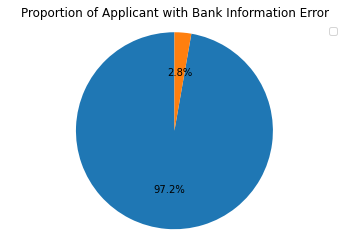

In [ ]:
values = [20526,581]
labels = ['Bank info error', 'Ineligible with no bank info error']
colors = ['#1f77b4', '#ff7f0e']

# Plot the pie chart
plt.pie(values, colors=colors, startangle=90, autopct='%1.1f%%')
plt.legend()
plt.axis('equal')
plt.title('Proportion of Applicant with Bank Information Error')

In [ ]:
# Filter dataframe where APP_ID is in ineligi list
invalid_ = applicant[applicant['APP_ID'].isin(ineligi)]

# Filter dataframe where APP_ID is NOT in ineligi list
valid_ = applicant[~applicant['APP_ID'].isin(ineligi)]

In [ ]:
invalid_

,APP_ID,START_TIME,END_TIME,P8N,PARTNER_P8N,BIRTH_DATE,FIRST_NAME,LAST_NAME,STREET_NAME,MUNICIPALITY_NAME,POSTAL_CODE,PROVINCE__ID,EMAIL,HOME_AREA_CODE,PHONE_NUMBER,EMPLOYMENT_STATUS,CUMUL_PAY
5,100005,2023-01-01:03:09:47,2023-01-01:03:29:12,33408533.0,31288799.0,1991-09-23,Patrick,Blair,4644 Andrew Islands,RICHMOND,V6X1A8,10.0,p.blair61@gmail.com,604.0,2708470.0,E,250
14,100014,2023-01-01:05:57:05,2023-01-01:06:12:17,50780523.0,20639236.0,1990-07-14,Lauren,Smith,88 Henderson Ville,LONDON,N6C4P3,6.0,smithlauren92@outlook.com,519.0,2080528.0,SE,250
16,100016,2023-01-01:06:05:46,2023-01-01:06:24:13,44826013.0,26356999.0,NaN,NaN,NaN,6970 Hicks Radial Apt. 543,MONTREAL,H3N2V8,5.0,NaN,438.0,7604893.0,UE,800
19,100019,2023-01-01:06:34:43,2023-01-01:06:52:42,74109384.0,80938566.0,1994-03-28,Koby,Kaur,3327 Gilmore Shores,NORTH YORK,M2J2X9,6.0,kaur44koby@gmail.com,416.0,2201087.0,UE,800
30,100030,2023-01-01:07:32:32,2023-01-01:07:54:33,44062077.0,19093166.0,1990-10-27,Kelly Jane,hough,62656 Chandler Oval,SAINT-HUBERT,J3Y5N1,5.0,kj.hough90@gmail.com,NaN,NaN,E,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186914,286914,2023-03-31:00:38:49,2023-03-31:00:58:24,20738296.0,22123373.0,1993-11-20,Jordain,Hyland,9360 Clark Isle,STRATFORD,N5A0B3,6.0,hyland38jordain@gmail.com,519.0,6256761.0,E,0
186921,286921,2023-03-31:00:59:59,2023-03-31:01:24:18,43674181.0,67273854.0,1989-08-18,Selena,Chandler,720 Ryan Islands,LANGLEY,V3A1V6,10.0,selenachandler55@outlook.com,604.0,2528518.0,UE,0
186926,286926,2023-03-31:01:35:04,2023-03-31:01:53:21,75358646.0,NaN,1992-06-15,michael,AYCENK,5434 Hunt Estate,WHITBY,L1R2C6,6.0,michaelaycenk8@gmail.com,905.0,2261851.0,E,0
186951,286951,2023-03-31:03:00:48,2023-03-31:03:18:35,33628498.0,NaN,1985-08-26,Bryna,Berge,983 Kevin Ports,YORK,M6E4H6,6.0,brynaqberge@gmail.com,416.0,3159469.0,ESE,0


In [ ]:
valid_

,APP_ID,START_TIME,END_TIME,P8N,PARTNER_P8N,BIRTH_DATE,FIRST_NAME,LAST_NAME,STREET_NAME,MUNICIPALITY_NAME,POSTAL_CODE,PROVINCE__ID,EMAIL,HOME_AREA_CODE,PHONE_NUMBER,EMPLOYMENT_STATUS,CUMUL_PAY
0,100000,2023-01-01:00:31:44,2023-01-01:00:51:58,39916021.0,65771788.0,1984-01-14,Melinda,Harfoush,8191 Blankenship Gateway,COURTICE,L1E0J2,6.0,melinda_harfoush39@gmail.com,416.0,1735604.0,UE,800
1,100001,2023-01-01:00:54:22,2023-01-01:01:19:03,28596991.0,25829667.0,1985-10-01,Vanesa,Whitty,4163 Werner Meadow Suite 321,SURREY,V3W9W5,10.0,vanesaxwhitty@live.ca,604.0,5132538.0,UE,1500
2,100002,2023-01-01:01:13:03,2023-01-01:01:32:07,65751811.0,63839036.0,1985-02-25,Kristen,Mclean,849 Timothy Vista,VANCOUVER,V5Z1Y2,10.0,kristenwmclean@gmail.com,NaN,NaN,UE,1500
3,100003,2023-01-01:02:07:01,2023-01-01:02:24:04,43012353.0,73277757.0,1987-03-27,Dang,Moerschfelder,8492 Odonnell Squares,MARKHAM,L3R8A5,6.0,dang.moerschfelder87@gmail.com,647.0,2730444.0,E,800
4,100004,2023-01-01:02:21:19,2023-01-01:02:42:20,34120896.0,72359770.0,1986-09-21,Jessica,Prockert,625 Arthur Forest Suite 533,RICHMOND,V7A3Y7,10.0,prockertjessica83@outlook.com,604.0,3201317.0,SE,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186952,286952,2023-03-31:03:02:26,2023-03-31:03:20:08,62146656.0,55132261.0,1991-04-16,Lily,Ross,648 Collins Streets,OLIVER,V0H1T3,10.0,lilytross@gmail.com,250.0,5789435.0,SE,0
186953,286953,2023-03-31:03:06:26,2023-03-31:03:29:47,39587551.0,78857785.0,1995-09-18,stacy,Hotsko,9287 Matthew Field,MONTREAL,H1V1A6,5.0,stacyhotsko94@gmail.com,514.0,7676972.0,UE,0
186954,286954,2023-03-31:03:07:41,2023-03-31:03:26:19,46553423.0,68775805.0,1986-01-11,Ya Xin,chartrand,76834 Kathleen Extension Apt. 144,FARNHAM,J2N2N1,5.0,yxchartrand86@outlook.com,514.0,4451410.0,E,0
186955,286955,2023-03-31:04:23:22,2023-03-31:04:46:22,29927474.0,NaN,1987-11-28,Julianna,chahal,135 Robinson Tunnel Apt. 92,QUEBEC,G2B2E4,5.0,chahaljulianna49@gmail.com,418.0,8263504.0,SE,0


# Investigation on Invalid Paid

In [ ]:
invalid_paid = invalid_[invalid_['CUMUL_PAY'] > 0]
invalid_paid

,APP_ID,START_TIME,END_TIME,P8N,PARTNER_P8N,BIRTH_DATE,FIRST_NAME,LAST_NAME,STREET_NAME,MUNICIPALITY_NAME,POSTAL_CODE,PROVINCE__ID,EMAIL,HOME_AREA_CODE,PHONE_NUMBER,EMPLOYMENT_STATUS,CUMUL_PAY
5,100005,2023-01-01:03:09:47,2023-01-01:03:29:12,33408533.0,31288799.0,1991-09-23,Patrick,Blair,4644 Andrew Islands,RICHMOND,V6X1A8,10.0,p.blair61@gmail.com,604.0,2708470.0,E,250
14,100014,2023-01-01:05:57:05,2023-01-01:06:12:17,50780523.0,20639236.0,1990-07-14,Lauren,Smith,88 Henderson Ville,LONDON,N6C4P3,6.0,smithlauren92@outlook.com,519.0,2080528.0,SE,250
16,100016,2023-01-01:06:05:46,2023-01-01:06:24:13,44826013.0,26356999.0,NaN,NaN,NaN,6970 Hicks Radial Apt. 543,MONTREAL,H3N2V8,5.0,NaN,438.0,7604893.0,UE,800
19,100019,2023-01-01:06:34:43,2023-01-01:06:52:42,74109384.0,80938566.0,1994-03-28,Koby,Kaur,3327 Gilmore Shores,NORTH YORK,M2J2X9,6.0,kaur44koby@gmail.com,416.0,2201087.0,UE,800
30,100030,2023-01-01:07:32:32,2023-01-01:07:54:33,44062077.0,19093166.0,1990-10-27,Kelly Jane,hough,62656 Chandler Oval,SAINT-HUBERT,J3Y5N1,5.0,kj.hough90@gmail.com,NaN,NaN,E,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124138,224138,2023-03-01:17:57:54,2023-03-01:18:14:48,87573442.0,85912554.0,1992-10-20,Hibo,Trudeau-Zacharie,956 Johnson Rest Apt. 195,YELLOWKNIFE,X1A2C4,11.0,trudeauzacharie16hibo@gmail.com,867.0,7440377.0,UE,400
124148,224148,2023-03-01:18:00:51,2023-03-01:18:23:47,17040490.0,25402899.0,1983-05-05,angela,Popovich,44236 Miller Springs Suite 279,MINTO,E4B3L7,3.0,a_popovich84@gmail.com,506.0,3020499.0,ESE,400
124149,224149,2023-03-01:18:00:56,2023-03-01:18:19:04,79405099.0,NaN,1994-08-12,Sophia,Mohr,6495 Megan Ways,LA MALBAIE,G5A1P9,5.0,sophiawmohr@gmail.com,418.0,1092909.0,SE,125
124150,224150,2023-03-01:18:01:04,2023-03-01:18:21:25,14314369.0,16297051.0,1984-01-30,Camille,Grant,376 Kelly Ridge,SAINT-JEAN-SUR-RICHELIEU,J3B4H6,5.0,c.grant83@gmail.com,514.0,8278396.0,E,400


# Investigation on Valid Fraud


In [ ]:
net_income['Net'] = net_income['employment_income_1'] + net_income['employment_income_2']
pay_merged = pd.merge(pd.merge(applicant[['APP_ID','P8N','START_TIME','END_TIME','CUMUL_PAY']],
                      net_income[['APP_ID','Net']],
                      on='APP_ID'),
             dependent
            ,on='APP_ID')
pay_merged.head()

,APP_ID,P8N_x,START_TIME,END_TIME,CUMUL_PAY,Net,P8N_y,PARTNER_P8N,DATE_BIRTH_1,DATE_BIRTH_2,DATE_BIRTH_3,DATE_BIRTH_4,DATE_BIRTH_5,DATE_BIRTH_6,DATE_BIRTH_7,DATE_BIRTH_8,DATE_BIRTH_9
0,100000,39916021.0,2023-01-01:00:31:44,2023-01-01:00:51:58,800,1592.294383,39916021,65771788.0,2016-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100001,28596991.0,2023-01-01:00:54:22,2023-01-01:01:19:03,1500,34349.000000,28596991,25829667.0,2019-10-17,2022-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100002,65751811.0,2023-01-01:01:13:03,2023-01-01:01:32:07,1500,8410.699316,65751811,63839036.0,2019-08-05,2013-06-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100003,43012353.0,2023-01-01:02:07:01,2023-01-01:02:24:04,800,31129.608140,43012353,73277757.0,2013-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100004,34120896.0,2023-01-01:02:21:19,2023-01-01:02:42:20,800,13545.683695,34120896,72359770.0,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# function check numebr of payment made to the applicant
def check_mon(dl,slic,time):
    comparison_date = datetime.strptime(time, '%Y-%m-%d:%H:%M:%S')
    slic_date = datetime.strptime(slic, '%Y-%m-%d:%H:%M:%S')
    dl_date = datetime.strptime(dl, '%Y-%m-%d:%H:%M:%S')
    if comparison_date > dl_date:
        return 0
    elif comparison_date > slic_date: 
        return 1
    else: return 2


In [ ]:
# function check if the target is single by checking partner P8N
def check_single (row):    
    if pd.isnull(row['PARTNER_P8N']):
        return True
    else: return False

In [ ]:
# funciton counts the numebr of dependent for given applicant
def count_child (row):
    count = 0
    for num in range(9):
        child = row['DATE_BIRTH_{}'.format(num+1)]
        if type(child) == float:
            break
        else:  
            count += 1
    return count

In [ ]:
# function return the theortical payment amount according to applicant's status
def pay_cate(row):
    dl = '2023-03-01:18:23:44'
    slic = '2023-02-01:17:14:51'
    mons = check_mon(dl,slic, row['END_TIME']) # checking number of paying terms
    #print(mons)
    child_num = count_child (row)
    if mons == 0:
        return 0
    elif row['Net'] <= 35000: # if the applicant is single
        if check_single(row):
            
            if child_num == 0:
                return 0
            elif child_num == 1:
                return 250*mons
            elif child_num == 2:
                return 400*mons
            else: return (400 + 100)*mons
        else: # if the applicant is not single 
            if child_num == 0:
                return 0
            elif child_num == 1:
                return 400*mons
            elif child_num == 2:
                return 750*mons
            else: return (750 + 200)*mons
    else:      
        if child_num == 0:
                return 0
        elif child_num == 1:
            return 125*mons
        elif child_num == 2:
            return 200*mons
        else: return (200 + 50)*mons

In [ ]:
# counting number of ineligble from payment standard
count_pay = 0
for index, row in pay_merged.iterrows():
    if not re.match(r'^\d{4}-\d{2}-\d{2}:\d{2}:\d{2}:\d{2}$', row['END_TIME']):
        continue      
    elif (pay_cate(row) != row['CUMUL_PAY'] and row['APP_ID'] not in ineligi):
        ineligi.append(row['APP_ID'])
        count_pay += 1

print(count_pay)

2565


In [ ]:
valid_server = server[~server['APP_ID'].isin(ineligi)]
valid_server['bot_score'].value_counts()
ip_count = valid_server['uip_address'].value_counts()
filtered_counts = ip_count[ip_count != 1]
print(filtered_counts)

Aaron.Tony.Clayton.Quarmarius     90
Mingyue.Dillon.Angelica.Miguel    78
Sarah.Kaylie.Hoang.Lindsey        76
Jacob.Ilyaas.Aura.Stevyrae        59
Kyle.Irvin.Amniyya.Torina         53
                                  ..
Bakar.Brandi.Farhat.Erik           2
Kristen.April.Suhaad.Ernesto       2
Cristian.Angel.Huda.Shamari        2
Christian.Ebony.Gianna.Naaila      2
Simone.Jack.Miqdaam.Najlaa         2
Name: uip_address, Length: 176, dtype: int64


In [ ]:
valid_1=valid_.copy()
valid_1.head()

valid_1['START_TIME'] = valid_1['START_TIME'].apply(lambda x: x if x[10] == ' ' else x[:10] + x[10:].replace(':', ' ', 1))
valid_1['END_TIME'] = valid_1['END_TIME'].apply(lambda x: x if x[10] == ' ' else x[:10] + x[10:].replace(':', ' ', 1))
print(valid_1.head())

valid_1['START_TIME'] = valid_1['START_TIME'].str.replace('-', '/')
valid_1['END_TIME'] = valid_1['END_TIME'].str.replace('-', '/')

valid_1['START_TIME'] = pd.to_datetime(valid_1['START_TIME'])
valid_1['END_TIME'] = pd.to_datetime(valid_1['END_TIME'])

valid_1['DURATION'] = valid_1['END_TIME'] - valid_1['START_TIME']
valid_1['minutes'] = valid_1['DURATION'].apply(lambda x: x.total_seconds() / 60.0)

count = 0
for i in valid_1['minutes']:
    if i<1:
        count += 1
print(count)

wrong_duration = []

count = 0
for index, row in valid_1.iterrows():
    min = row['minutes']
    if min <= 1:
        count += 1
        wrong_duration.append(row['APP_ID'])
    else: 
        continue
print(count) 
print(wrong_duration)

   APP_ID           START_TIME             END_TIME         P8N  PARTNER_P8N  \
0  100000  2023-01-01 00:31:44  2023-01-01 00:51:58  39916021.0   65771788.0   
1  100001  2023-01-01 00:54:22  2023-01-01 01:19:03  28596991.0   25829667.0   
2  100002  2023-01-01 01:13:03  2023-01-01 01:32:07  65751811.0   63839036.0   
3  100003  2023-01-01 02:07:01  2023-01-01 02:24:04  43012353.0   73277757.0   
4  100004  2023-01-01 02:21:19  2023-01-01 02:42:20  34120896.0   72359770.0   

   BIRTH_DATE FIRST_NAME      LAST_NAME                   STREET_NAME  \
0  1984-01-14    Melinda       Harfoush      8191 Blankenship Gateway   
1  1985-10-01     Vanesa         Whitty  4163 Werner Meadow Suite 321   
2  1985-02-25    Kristen         Mclean             849 Timothy Vista   
3  1987-03-27       Dang  Moerschfelder         8492 Odonnell Squares   
4  1986-09-21    Jessica       Prockert   625 Arthur Forest Suite 533   

  MUNICIPALITY_NAME POSTAL_CODE  PROVINCE__ID                           EMAIL  \

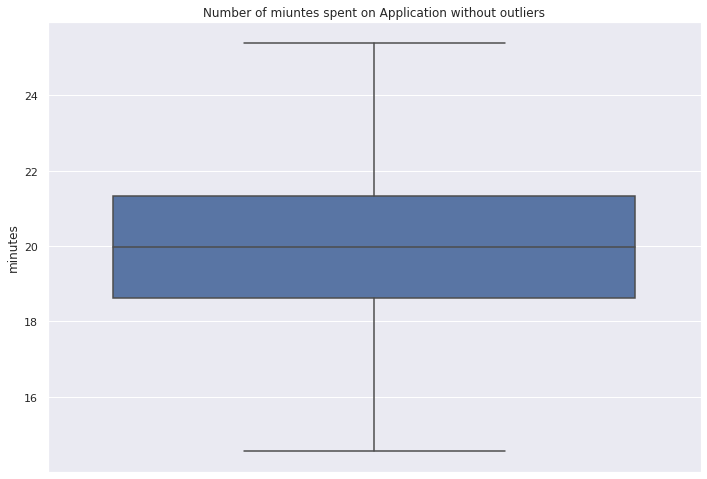

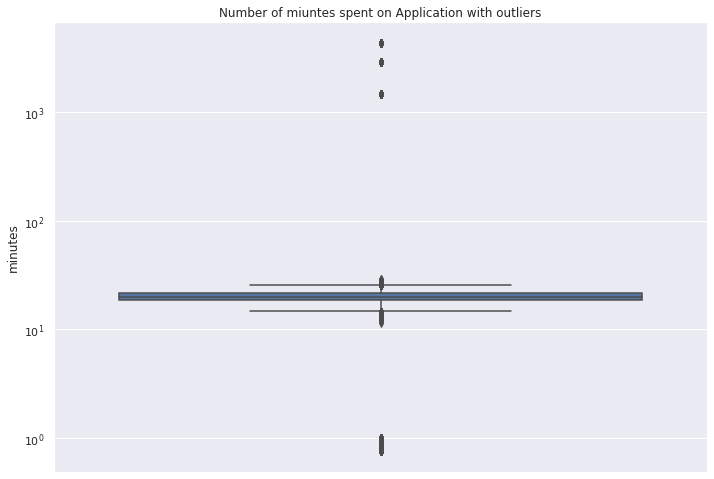

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=valid_1, y="minutes", showfliers=False)   
ax.set_title('Number of miuntes spent on Application without outliers')
plt.show()

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=valid_1, y="minutes", showfliers=True)   
ax.set_title('Number of miuntes spent on Application with outliers')
plt.yscale('log')
plt.show()

In [ ]:
# Count the number of NaN and inf values in PHONE_NUMBER column
num_nan = valid_['PHONE_NUMBER'].isna().sum()
num_inf = valid_['PHONE_NUMBER'].isin([np.inf, -np.inf]).sum()

# Print the number of NaN and inf values
print("Number of NaN values:", num_nan)
print("Number of inf values:", num_inf)

valid_['PHONE_NUMBER'].fillna(0, inplace=True)

# Get a series of phone numbers and their counts
phone_counts = valid_['PHONE_NUMBER'].astype(int).value_counts()

# Filter the series to include only phone numbers that appear more than once
duplicate_phone_numbers = phone_counts[phone_counts > 1]

# Print the phone numbers and their counts
dup_phone = []
dupcount2 = 0
for phone_number, count in duplicate_phone_numbers.items():
    if phone_number > 3:
      dup_phone.append(phone_number)
    if count == 2:
        dupcount2 += 1
    print("Phone number:", phone_number, "| Number of duplications:", count)
print(dup_phone)
print(dupcount2)

Number of NaN values: 41287
Number of inf values: 0
Phone number: 0 | Number of duplications: 41287
Phone number: 5878766 | Number of duplications: 66
Phone number: 1644266 | Number of duplications: 66
Phone number: 9037623 | Number of duplications: 53
Phone number: 3568617 | Number of duplications: 47
Phone number: 4062627 | Number of duplications: 3
Phone number: 9417989 | Number of duplications: 3
Phone number: 4456136 | Number of duplications: 3
Phone number: 5814436 | Number of duplications: 3
Phone number: 2322726 | Number of duplications: 3
Phone number: 9811781 | Number of duplications: 3
Phone number: 6403818 | Number of duplications: 3
Phone number: 9461357 | Number of duplications: 3
Phone number: 3729289 | Number of duplications: 2
Phone number: 2920034 | Number of duplications: 2
Phone number: 2452315 | Number of duplications: 2
Phone number: 1237628 | Number of duplications: 2
Phone number: 7650252 | Number of duplications: 2
Phone number: 9544497 | Number of duplications

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


| Number of duplications: 2
Phone number: 9168767 | Number of duplications: 2
Phone number: 2553199 | Number of duplications: 2
Phone number: 1109026 | Number of duplications: 2
Phone number: 1209472 | Number of duplications: 2
Phone number: 9461841 | Number of duplications: 2
Phone number: 9257914 | Number of duplications: 2
Phone number: 2748842 | Number of duplications: 2
Phone number: 7942209 | Number of duplications: 2
Phone number: 9543514 | Number of duplications: 2
Phone number: 4718754 | Number of duplications: 2
Phone number: 6959182 | Number of duplications: 2
Phone number: 5117543 | Number of duplications: 2
Phone number: 1046762 | Number of duplications: 2
Phone number: 5577482 | Number of duplications: 2
Phone number: 3870173 | Number of duplications: 2
Phone number: 5795626 | Number of duplications: 2
Phone number: 3145977 | Number of duplications: 2
Phone number: 9974773 | Number of duplications: 2
Phone number: 9200041 | Number of duplications: 2
Phone number: 9274342 

In [ ]:
valid_[valid_['PHONE_NUMBER'] == 1644266]

,APP_ID,START_TIME,END_TIME,P8N,PARTNER_P8N,BIRTH_DATE,FIRST_NAME,LAST_NAME,STREET_NAME,MUNICIPALITY_NAME,POSTAL_CODE,PROVINCE__ID,EMAIL,HOME_AREA_CODE,PHONE_NUMBER,EMPLOYMENT_STATUS,CUMUL_PAY
96576,196576,2023-02-16 03:00:00,2023-02-16 03:00:45,79515827.0,53765711.0,1993-03-17,Alexa,Erakovic,169 Lawson Stream,AURORA,L4G7T9,6.0,a.erakovic98@outlook.com,226.0,1644266.0,E,125
97195,197195,2023-02-16 03:00:00,2023-02-16 03:00:45,71786357.0,53765711.0,1975-08-22,Gavin,Thompson,641 Mason Way,ELPHINSTONE,R0J0N0,7.0,gavinthompson@gmail.com,226.0,1644266.0,E,125
97330,197330,2023-02-16 03:00:00,2023-02-16 03:00:45,60718603.0,53765711.0,1977-11-12,Royan,Alexander,7191 Teresa Fort Suite 44,CANTON DES BASQUES,E1X3J6,3.0,r_alexander57@gmail.com,226.0,1644266.0,E,125
97819,197819,2023-02-16 03:00:00,2023-02-16 03:00:45,72365338.0,53765711.0,1985-03-11,WESLEY,Barber,6213 Emily Trafficway Apt. 295,SAULT STE. MARIE,P6B5W5,6.0,wesley.barber63@outlook.com,226.0,1644266.0,UE,400
98067,198067,2023-02-16 03:00:00,2023-02-16 03:00:45,40481726.0,53765711.0,1991-10-07,RYAN,Kumar,298 Samantha Fords Suite 773,WINDSOR,J1S2J9,5.0,r_kumar82@gmail.com,226.0,1644266.0,E,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138303,238303,2023-03-08 03:00:00,2023-03-08 03:00:45,62258830.0,53765711.0,1979-12-29,sarah,Douglas,289 Matthew Lights,DIEPPE,E1A0S7,3.0,douglas42sarah@gmail.com,226.0,1644266.0,E,0
138314,238314,2023-03-08 03:00:00,2023-03-08 03:00:45,62242799.0,53765711.0,1993-06-06,Jennifer,Galang,85 Brown Manors Apt. 497,SAINT-JEROME,J7Y4R2,5.0,jgalang48@gmail.com,226.0,1644266.0,UE,0
138626,238626,2023-03-08 03:00:00,2023-03-08 03:00:45,40287173.0,53765711.0,1992-09-28,Mackenzie,Sidhu,615 Mcdaniel Mews,SURREY,V3W3T3,10.0,sidhumackenzie37@gmail.com,226.0,1644266.0,E,0
138658,238658,2023-03-08 03:00:00,2023-03-08 03:00:45,73355120.0,53765711.0,1996-05-24,matthew,McConnell,859 Lynn Field Apt. 159,CALGARY,T2K5S9,9.0,mcconnell70matthew@gmail.com,226.0,1644266.0,E,0


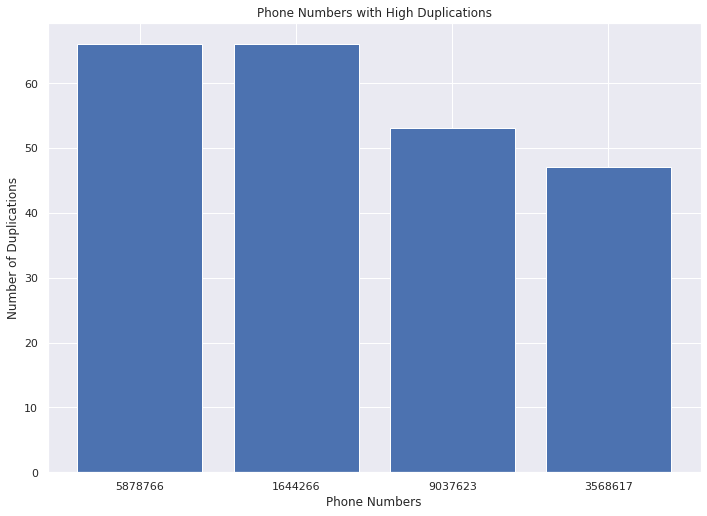

In [ ]:
import matplotlib.pyplot as plt

# Get a series of phone numbers and their counts, excluding 0
phone_counts_no0 = valid_[valid_['PHONE_NUMBER'] != 0]['PHONE_NUMBER'].astype(int).value_counts()

# Filter the series to include only phone numbers that appear more than three times
duplicate_phone_numbers = phone_counts_no0[phone_counts_no0 > 3]

# Create a bar chart of the duplicate phone numbers
plt.bar(duplicate_phone_numbers.index.astype(str), duplicate_phone_numbers.values)

# Set the chart title and labels
plt.title("Phone Numbers with High Duplications")
plt.xlabel("Phone Numbers")
plt.ylabel("Number of Duplications")

# Show the chart
plt.show()



In [ ]:
# Get a series of phone numbers and their counts
p8n_counts = valid_['P8N'].value_counts()

# Filter the series to include only phone numbers that appear more than once
duplicate_p8n = p8n_counts[p8n_counts > 1]

# Print the phone numbers and their counts
p8ncount = 0
for p8n, count in duplicate_p8n.items():
    print("P8N:", p8n, "| Number of duplications:", count)
    p8ncount+=1

print(p8ncount)

valid_[valid_['P8N']== 75598754.0]

P8N: 75598754.0 | Number of duplications: 17
P8N: 21748462.0 | Number of duplications: 15
P8N: 81789457.0 | Number of duplications: 15
P8N: 67457451.0 | Number of duplications: 15
P8N: 12054210.0 | Number of duplications: 15
P8N: 30174831.0 | Number of duplications: 14
P8N: 77967218.0 | Number of duplications: 14
P8N: 53424135.0 | Number of duplications: 14
P8N: 61055348.0 | Number of duplications: 14
P8N: 47569169.0 | Number of duplications: 14
P8N: 26755034.0 | Number of duplications: 13
P8N: 12217666.0 | Number of duplications: 13
P8N: 71731973.0 | Number of duplications: 13
P8N: 72107069.0 | Number of duplications: 13
P8N: 27421756.0 | Number of duplications: 13
P8N: 23099853.0 | Number of duplications: 13
P8N: 66118455.0 | Number of duplications: 13
P8N: 80651833.0 | Number of duplications: 12
P8N: 48115349.0 | Number of duplications: 12
P8N: 63059655.0 | Number of duplications: 12
P8N: 52503277.0 | Number of duplications: 12
P8N: 79503629.0 | Number of duplications: 12
P8N: 85000

,APP_ID,START_TIME,END_TIME,P8N,PARTNER_P8N,BIRTH_DATE,FIRST_NAME,LAST_NAME,STREET_NAME,MUNICIPALITY_NAME,POSTAL_CODE,PROVINCE__ID,EMAIL,HOME_AREA_CODE,PHONE_NUMBER,EMPLOYMENT_STATUS,CUMUL_PAY
697,100697,2023-01-01:10:11:53,2023-01-02:10:29:36,75598754.0,74629621.0,2000-08-06,Angel,French,PO BOX 2564 STN A,BROSSARD,J4Z3M5,5.0,Fre441@concierge.fr,438.0,9633495.0,UE,800
7211,107211,2023-01-04:17:02:09,2023-01-04:17:20:40,75598754.0,NaN,1994-12-19,Jake,Aussant,3224 Christine Plaza Suite 468,SAINT-LEONARD,H1S0A1,5.0,jake_aussant@outlook.com,NaN,0.0,E,500
9206,109206,2023-01-05:11:02:01,2023-01-05:11:24:55,75598754.0,32824243.0,1984-03-09,Phoebe,Gagnon,87688 Tonya Village Suite 581,PORT ALBERNI,V9Y2C8,10.0,phoebe.gagnon63@gmail.com,NaN,0.0,UE,800
11595,111595,2023-01-05:21:30:39,2023-01-05:21:50:11,75598754.0,32824243.0,1987-01-12,Christina,Ennis,64417 Tanner Court Suite 587,WINNIPEG,R2M4C5,7.0,ennis.christina87@gmail.com,204.0,1463277.0,ESE,800
14757,114757,2023-01-08:15:41:13,2023-01-08:15:59:27,75598754.0,37767091.0,1982-08-13,Laurie,Montgomery,72 Spears Way Apt. 312,CHATHAM,N7L2H7,6.0,lauriehmontgomery@outlook.com,NaN,0.0,ESE,250
20413,120413,2023-01-11:12:05:38,2023-01-11:12:25:43,75598754.0,NaN,1992-06-11,Donovan,Thomas,133 Stephens Point,GATINEAU,J8L3Z3,5.0,d.thomas15@gmail.com,NaN,0.0,E,250
20623,120623,2023-01-11:12:50:18,2023-01-11:13:12:25,75598754.0,12840755.0,1987-03-02,Sarah,Galbraith,21 Duarte Ways Suite 940,COALDALE,T1M1C3,9.0,s.galbraith29@gmail.com,403.0,9445386.0,SE,250
22243,122243,2023-01-11:19:03:45,2023-01-11:19:24:10,75598754.0,63675983.0,1994-05-21,Shari,Trottier,92219 Jason Gardens,SASKATOON,S7T0X5,8.0,sharivtrottier@gmail.com,306.0,5341842.0,E,250
27840,127840,2023-01-13:16:11:36,2023-01-13:16:34:53,75598754.0,11980329.0,2001-07-23,Norma,Leon,8631 Tracy Field Suite 689,NEW WESTMINSTER,V3M3P8,10.0,norma_leon67@gmail.com,604.0,9916647.0,E,800
28189,128189,2023-01-13:18:42:32,2023-01-13:19:06:21,75598754.0,12217666.0,2000-06-20,Tanya,Nielsen,85667 Hoffman Tunnel Apt. 698,L'ASSOMPTION,J5W1Y6,5.0,tanyawnielsen@gmail.com,NaN,0.0,E,500


In [ ]:
valid_[valid_['P8N'] == 75598754.0]

,APP_ID,START_TIME,END_TIME,P8N,PARTNER_P8N,BIRTH_DATE,FIRST_NAME,LAST_NAME,STREET_NAME,MUNICIPALITY_NAME,POSTAL_CODE,PROVINCE__ID,EMAIL,HOME_AREA_CODE,PHONE_NUMBER,EMPLOYMENT_STATUS,CUMUL_PAY
697,100697,2023-01-01:10:11:53,2023-01-02:10:29:36,75598754.0,74629621.0,2000-08-06,Angel,French,PO BOX 2564 STN A,BROSSARD,J4Z3M5,5.0,Fre441@concierge.fr,438.0,9633495.0,UE,800
7211,107211,2023-01-04:17:02:09,2023-01-04:17:20:40,75598754.0,NaN,1994-12-19,Jake,Aussant,3224 Christine Plaza Suite 468,SAINT-LEONARD,H1S0A1,5.0,jake_aussant@outlook.com,NaN,0.0,E,500
9206,109206,2023-01-05:11:02:01,2023-01-05:11:24:55,75598754.0,32824243.0,1984-03-09,Phoebe,Gagnon,87688 Tonya Village Suite 581,PORT ALBERNI,V9Y2C8,10.0,phoebe.gagnon63@gmail.com,NaN,0.0,UE,800
11595,111595,2023-01-05:21:30:39,2023-01-05:21:50:11,75598754.0,32824243.0,1987-01-12,Christina,Ennis,64417 Tanner Court Suite 587,WINNIPEG,R2M4C5,7.0,ennis.christina87@gmail.com,204.0,1463277.0,ESE,800
14757,114757,2023-01-08:15:41:13,2023-01-08:15:59:27,75598754.0,37767091.0,1982-08-13,Laurie,Montgomery,72 Spears Way Apt. 312,CHATHAM,N7L2H7,6.0,lauriehmontgomery@outlook.com,NaN,0.0,ESE,250
20413,120413,2023-01-11:12:05:38,2023-01-11:12:25:43,75598754.0,NaN,1992-06-11,Donovan,Thomas,133 Stephens Point,GATINEAU,J8L3Z3,5.0,d.thomas15@gmail.com,NaN,0.0,E,250
20623,120623,2023-01-11:12:50:18,2023-01-11:13:12:25,75598754.0,12840755.0,1987-03-02,Sarah,Galbraith,21 Duarte Ways Suite 940,COALDALE,T1M1C3,9.0,s.galbraith29@gmail.com,403.0,9445386.0,SE,250
22243,122243,2023-01-11:19:03:45,2023-01-11:19:24:10,75598754.0,63675983.0,1994-05-21,Shari,Trottier,92219 Jason Gardens,SASKATOON,S7T0X5,8.0,sharivtrottier@gmail.com,306.0,5341842.0,E,250
27840,127840,2023-01-13:16:11:36,2023-01-13:16:34:53,75598754.0,11980329.0,2001-07-23,Norma,Leon,8631 Tracy Field Suite 689,NEW WESTMINSTER,V3M3P8,10.0,norma_leon67@gmail.com,604.0,9916647.0,E,800
28189,128189,2023-01-13:18:42:32,2023-01-13:19:06:21,75598754.0,12217666.0,2000-06-20,Tanya,Nielsen,85667 Hoffman Tunnel Apt. 698,L'ASSOMPTION,J5W1Y6,5.0,tanyawnielsen@gmail.com,NaN,0.0,E,500


In [ ]:
# Find all the unique P8N values that appear in the PARTNER_P8N column
partner_p8n_values = valid_['PARTNER_P8N'].unique()


# Filter the dataframe to include only rows where the P8N value is found in the partner_p8n_values array
p8ndup = valid_[valid_['P8N'].isin(partner_p8n_values)]
p8ndup

,APP_ID,START_TIME,END_TIME,P8N,PARTNER_P8N,BIRTH_DATE,FIRST_NAME,LAST_NAME,STREET_NAME,MUNICIPALITY_NAME,POSTAL_CODE,PROVINCE__ID,EMAIL,HOME_AREA_CODE,PHONE_NUMBER,EMPLOYMENT_STATUS,CUMUL_PAY
1,100001,2023-01-01:00:54:22,2023-01-01:01:19:03,28596991.0,25829667.0,1985-10-01,Vanesa,Whitty,4163 Werner Meadow Suite 321,SURREY,V3W9W5,10.0,vanesaxwhitty@live.ca,604.0,5132538.0,UE,1500
12,100012,2023-01-01:05:33:30,2023-01-01:05:55:01,34583763.0,76063280.0,1987-08-25,Tammy,Sanderson,264 Kelly Cliff,BLACK CREEK,V9J1J9,10.0,tammysanderson@gmail.com,250.0,4640720.0,E,500
15,100015,2023-01-01:06:05:39,2023-01-01:06:22:36,53424135.0,67414299.0,1988-10-22,Michelle,Yost,PO BOX 3001 STN B,NAPANEE,K7R3P3,6.0,Yos593@duamail.com,613.0,4338096.0,UE,800
22,100022,2023-01-01:06:50:44,2023-01-01:07:07:41,77203423.0,20134300.0,1981-12-14,Brigitte,Charlie,5118 Johnson Ford Apt. 587,SCARBOROUGH,M1G3K8,6.0,charlie77brigitte@outlook.com,416.0,1350722.0,UE,800
23,100023,2023-01-01:07:00:40,2023-01-01:07:20:47,30846737.0,33544013.0,1995-11-02,Trevor,Woehl,940 Salazar Views,SAINT-RAYMOND,G3L3N3,5.0,trevorwoehl68@gmail.com,418.0,1655277.0,ESE,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46309,146309,2023-01-24:12:00:46,2023-01-24:12:20:33,16877631.0,45678182.0,1998-01-10,MARGARET,gomes goncalves,742 Hensley Lake Apt. 643,CALEDONIA,N3W1G2,6.0,margaretgomesgoncalves55@.edu,NaN,0.0,UE,250
46614,146614,2023-01-24:13:30:50,2023-01-24:13:51:57,77080602.0,20110209.0,NaN,NaN,NaN,9335 Dylan Village,MATANE,G4W2E4,5.0,NaN,418.0,6554474.0,SE,250
46721,146721,2023-01-24:13:56:05,2023-01-24:14:16:10,34583763.0,NaN,1995-06-25,yodit,Rennie,2295 Jimenez Forge Apt. 290,CORBEIL,P0H1K0,6.0,rennie84yodit@gmail.com,705.0,8468034.0,UE,500
46733,146733,2023-01-24:13:59:12,2023-01-24:14:20:00,61184024.0,77967218.0,1991-04-28,Susan,Felsman,49161 Armstrong Knoll,MARKHAM,L3S4T8,6.0,felsman.susan89@live.ca,NaN,0.0,E,250


In [ ]:
invalid_F = []
# Loop through the APP_ID column and add unique values to the list
for app_id in invalid_paid['APP_ID']:
    if app_id not in invalid_F:
        invalid_F.append(app_id)
print(len(invalid_F))

13612


In [ ]:
valid_F = []
# Loop through the dataframe and add unique APP_ID values to the list if the corresponding PHONE_NUMBER value is in the dup_phone list
for index, row in valid_.iterrows():
    if row['APP_ID'] not in valid_F and row['PHONE_NUMBER'] in dup_phone:
        valid_F.append(row['APP_ID'])
print(len(valid_F))

#Loop through the dataframe and add unique APP_ID values to the list 
#if not already in the list
for app_id in p8ndup['APP_ID']:
    if app_id not in valid_F:
        valid_F.append(app_id)
print(len(valid_F))

for app_id in wrong_duration:
  if app_id not in valid_F:
    valid_F.append(app_id)
print(len(valid_F))

2228
3496
4044


In [ ]:
for i in valid_F:
  if i not in invalid_F:
    invalid_F.append(i)
print(len(invalid_F))

final_result = applicant.copy()
final_result['true_if_error'] = final_result['APP_ID'].isin(invalid_F)
final_result = final_result.loc[:, ['APP_ID', 'true_if_error']]
final_result = final_result.reset_index(drop=True)
final_result
final_result.to_csv('solution.csv', index=False)

17656


In [ ]:
high = [5878766,1644266,9037623,3568617]
filtered_df = applicant[applicant['PHONE_NUMBER'].isin(high)]
print(filtered_df)
color_counts = server['uip_address'].value_counts()

# generate a list of ids for colors that occur more than 2 times
ids = server[server['uip_address'].isin(color_counts[color_counts >= 2].index)]['APP_ID'].tolist()

common_elements = set(filtered_df['APP_ID']).intersection(set(ids))
count = len(common_elements)
print(count)

        APP_ID           START_TIME             END_TIME         P8N  \
47191   147191  2023-01-24 03:00:00  2023-01-24 03:00:45  14961124.0   
47487   147487  2023-01-24 03:00:00  2023-01-24 03:00:45  15977970.0   
47844   147844  2023-01-24 03:00:00  2023-01-24 03:00:45  12130236.0   
47859   147859  2023-01-24 03:00:00  2023-01-24 03:00:45  44813315.0   
51495   151495  2023-01-25 03:00:00  2023-01-25 03:00:45  23387043.0   
...        ...                  ...                  ...         ...   
184003  284003  2023-03-30 03:00:00  2023-03-30 03:00:45  43821336.0   
184558  284558  2023-03-30 03:00:00  2023-03-30 03:00:45  29367258.0   
184971  284971  2023-03-30 03:00:00  2023-03-30 03:00:45  64575007.0   
186013  286013  2023-03-30 03:00:00  2023-03-30 03:00:45  46985832.0   
186066  286066  2023-03-30 03:00:00  2023-03-30 03:00:45  75539680.0   

        PARTNER_P8N  BIRTH_DATE    FIRST_NAME       LAST_NAME  \
47191    64196712.0  1985-10-05        Dmytro       Metherell   
47487

5878766    66
1644266    66
9037623    53
3568617    47
2322726     3
           ..
5580723     1
5113877     1
2816183     1
6675992     1
2864275     1
Name: PHONE_NUMBER, Length: 123334, dtype: int64


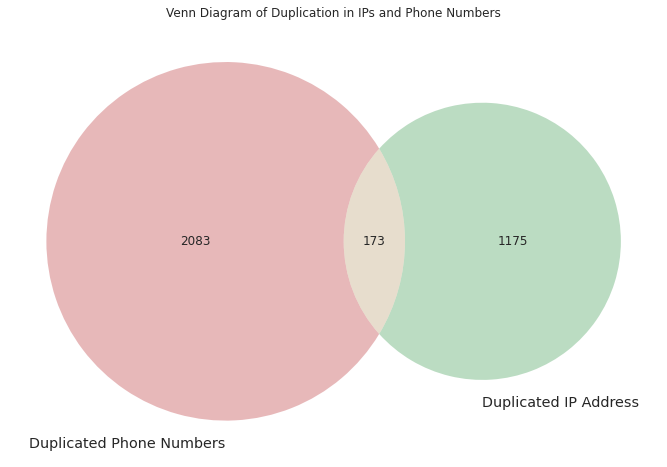

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

venn2([set(filtered_df['APP_ID']), set(ids)], set_labels=('Duplicated Phone Numbers', 'Duplicated IP Address'))
plt.title('Venn Diagram of Duplication in IPs and Phone Numbers')
plt.show()
